#Fonction de la transformé de Haar 1D et Quadratique 1D

In [0]:
import numpy as np
import math

def downsizing(u):
  m = int(np.floor(len(u)/2))
  v = np.zeros((m),float)
  v[0:m] = (u[0:2*m-1:2] + u[1:2*m:2])/2
  return v

def upsizingH(m,u):
  v = np.zeros((m))
  v[0:m] = (u[0:2*m-1:2]-u[1:2*m:2])/2
  return v

#Détails

def upsizingQN(v,uM):
    m = (len(v))//2
    g = np.zeros((m))
    c = np.zeros((m))
    d = np.zeros((m))
    concat = np.concatenate((uM,uM))
    res = np.zeros((m))
    if m > 1 :
        g[0:m] = np.absolute(concat[(m-2)%(2*m):(2*m-2)%(2*m)] - concat[(m-1)%(2*m):(2*m-1)%(2*m)]) + np.absolute(concat[(m-1)%(2*m):(2*m-1)%(2*m)] - concat[m%(2*m):(2*m)])
        c[0:m] = np.absolute(concat[(m-1)%(2*m):(2*m-1)%(2*m)] - concat[m:2*m]) + np.absolute(concat[0:m] - concat[1:m+1])
        d[0:m] = np.absolute(concat[0:m] - concat[1:m+1]) + np.absolute(concat[1:m+1] - concat[2:m+2])
    y = np.zeros((m))
    for i in range(m):
        if g[i] < c[i] and g[i] < d[i]:
            y[i] =  (uM[i]*(5/8)) + (uM[( i-1)%m]/2) -(uM[(i-2)%m]/8)
        elif d[i] < c[i] and d[i] < g[i]:
            y[i] = (uM[i]*(11/8)) - (uM[(i+1)%m]/2) + (uM[(i+2)%m]/8)
        else: 
            y[i] = uM[i] - (uM[(i-1)%m] - uM[(i+1)%m])/8
    res[0:m] = v[0:2*m:2] - y[0:m] 
    return res

def haarl_1d_inv(u):
	v= np.zeros((len(u)),float)
	v= np.copy(u)
	w= np.zeros((len(u)))
	m=1

	while m < len(u):
		w[0:2*m:2] = ( v[0:m] + v[m:2*m])
		w[1:2*m:2] = ( v[0:m] - v[m:2*m])
		v[0:2*m] = w[0:2*m]
		m=2*m
	return v

def haarl_dir(u):
  if (len(u) == 1):
    return u
  else :
    m = int(np.floor(len(u)/2))
    ds = downsizing(u) # Calcule des moyennes
    us = upsizingH(m,u) # Upsizing
    return np.concatenate((haarl_dir(ds), us)) 

def quadDir(n,u):
    v = np.copy(u)
    res = np.zeros((n))
    m = n
    while 1 < m :
      m = (m//2)
      w = np.zeros((m))
      #Downsizing
      w[0:m] = (v[0:2*m-1:2] + v[1:2*m:2]) / 2
      w2 = np.copy(w)
      #Upsizing
      if m == 1:
        w[0] = w[0] - v[0]
        res[m:m*2] = w[0:m]
      else :
        w[1:m-1] = (w2[1:m-1] - (w2[0:m-2] - w2[2:m])/8)
        w[0] = (w2[0] - (w2[m-1] - w2[1])/8) 
        w[m-1] = (w2[m-1] - (w2[m-2] - w2[0])/8) 
        w[0:m] = w[0:m] - v[0:m*2:2]
        res[m:m*2] = w[0:m]
        v = np.copy(w2)
    res[0] = w2[0] 
    return res
  
def concat(x,x1):
    n = len(x)
    w = np.zeros((2*n))
    for i in range(n):
        w[0:2*n-1:2] = x[0:n]
        w[1:2*n:2] = x1[0:n]
    return w
  
def quadInv(x):
    n=1
    i=np.array(1) #indice parcours de x, on commence a partir du deuxieme nombre
    x2 = np.copy([x[0]]) # liste des moyenennes avec lesquelles on construit x1 
    m = len(x)
    while(n<= m/2):
        x1=np.zeros((n))
        x1b=np.zeros((n))
        w = np.zeros((n)) 
        
        if n > 1 :             
            w[1:n-1] = x2[1:n-1] - (x2[0:n-2] - x2[2:n])/8
            w[0] = x2[0] - (x2[(n-1)] - x2[1])/8
            w[n-1] = (x2[n-1] - (x2[(n-2)] - x2[0])/8) 
        if n == 1 :
            w[0] = x2[0] 
        x1[0:n] = w[0:n] - x[i:i+n]
        x1b[0:n] = 2*x2[0:n]-x1[0:n]
        x1 = concat(x1,x1b)
        i=i+n
        x2 = np.copy(x1)
        n = len(x1)
    return x1

#Exercice 1: Transformer 2D directe produit tensoriel

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def transformDirect2D(A,i):
  N = len(A)
  work = np.zeros((N,N))
  Lmax = int(math.log2(N))
  Lmin = Lmax - i
  for l in range(Lmax,Lmin,-1):
    for i in range(N):
      work[i,:]=haarl_dir(A[i,:])
    A = np.copy(work)
    for j in range(N):
      work[:,j] = haarl_dir(A[:,j])
    A = np.copy(work)
    N = N//2
  return A

def transformDirect2DQ(A,n):
  N = len(A)
  work = np.zeros((N,N))
  Lmax = int(math.log2(N))
  Lmin = Lmax - n
  for l in range(Lmax,Lmin,-1):
    for i in range(N):
      work[i,:] = quadDir(N,A[i,:])
    A = np.copy(work)
    for j in range(N):
      work[:,j] = quadDir(N,A[:,j])
    A = np.copy(work)
    N = N//2
  return A


#Exercice 2: Transformer 2D inverse produit tensoriel

In [0]:
import numpy as np

def transformInv2D(A,i):
  N = len(A)
  Lmax = int(math.log2(N))
  Lmin = Lmax - i
  n = (2**Lmin)*2
  work = np.copy(A)
  for l in range(Lmin,Lmax):
      for j in range(n):
          work[:,j] = haarl_1d_inv(A[:,j])
      A = np.copy(work)
      for i in range(n):
          work[i,:] = haarl_1d_inv(A[i,:])
      A = np.copy(work)
      n = n*2
  return A

def transformInv2DQ(A,n):
  N = len(A)
  Lmax = int(math.log2(N))
  Lmin = Lmax - n
  s = (2**Lmin)*2
  work = np.copy(A)
  Lmax = int(math.log2(N))
  for l in range(Lmin,Lmax):
      for j in range(s):
          work[:,j] = quadInv(A[:,j])
      A = np.copy(work)
      for i in range(s):
          work[i,:] = quadInv(A[i,:])
      A = np.copy(work)
      n = n*2
  return A

#Exercice 3: Vérification

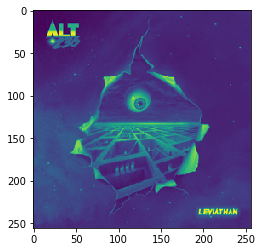


vérification pour Haar


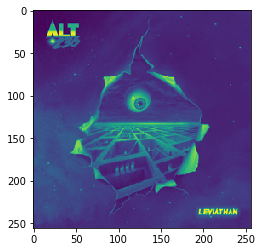


Vérification pour Quad


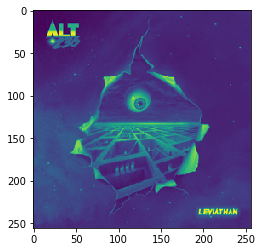

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

#Ramene n'importe quel image a une taille 256*256
size = 256
SIZE = size, size
image = Image.open("/content/drive/My Drive/Data/LEVIATHAN.jpg").convert('L')
image.thumbnail(SIZE)

npImage=np.array(image,float)
plt.imshow(npImage)
plt.show()

npImageH = transformInv2D(transformDirect2D(npImage,1),1)
npImageQ = transformInv2DQ(transformDirect2DQ(npImage,1),1)


print("\nvérification pour Haar")
plt.imshow(npImageH,interpolation='nearest')
plt.show()

print("\nVérification pour Quad")
plt.imshow(npImageQ,interpolation='nearest')
plt.show()
#plt.imshow(npImage,interpolation='nearest')


In [0]:
print (npImage,'\n')
print (npImageH,'\n')
print (npImageQ,'\n')

[[ 8.  6.  6. ... 33. 32. 35.]
 [ 7.  5.  6. ... 30. 32. 34.]
 [ 7.  6.  6. ... 30. 32. 33.]
 ...
 [38. 35. 34. ... 32. 31. 31.]
 [41. 35. 35. ... 29. 28. 30.]
 [38. 38. 40. ... 31. 29. 31.]] 

[[ 8.  6.  6. ... 33. 32. 35.]
 [ 7.  5.  6. ... 30. 32. 34.]
 [ 7.  6.  6. ... 30. 32. 33.]
 ...
 [38. 35. 34. ... 32. 31. 31.]
 [41. 35. 35. ... 29. 28. 30.]
 [38. 38. 40. ... 31. 29. 31.]] 

[[ 8.  6.  6. ... 33. 32. 35.]
 [ 7.  5.  6. ... 30. 32. 34.]
 [ 7.  6.  6. ... 30. 32. 33.]
 ...
 [38. 35. 34. ... 32. 31. 31.]
 [41. 35. 35. ... 29. 28. 30.]
 [38. 38. 40. ... 31. 29. 31.]] 



#Exercice 4: Bruit et sueil




In [0]:
from scipy.ndimage import gaussian_filter

def seuilH(x,T):
	y= np.copy(x)
	y[np.absolute(y)<=T]=0
	return y

def seuilS(x,T):
  y= np.copy(x)
  y[np.absolute(y)<=T]=0
  y[np.absolute(y)>T]=y[np.absolute(y)>T]-T
  return y

def seuillage(A,s):
    N = len(A)
    y = np.zeros((N,N))
    v = np.sqrt(np.var(A))

    for i in range(N):
        y[i,:] = seuilS(A[i,:],s)
    return y

def seuillage2(A,s): #n'affiche pas S
    N = len(A)
    y = np.zeros((N,N))
    v = np.sqrt(np.var(A))

    for i in range(N):
        y[i,:] = seuilH(A[i,:],s)
    return y

Image avec du bruit


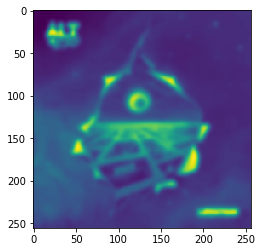

Image corriger avec un seuil dou de  2.686087420453924


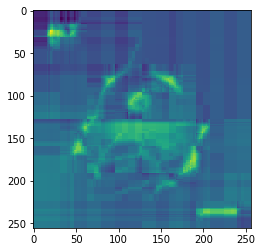

Image corriger avec un seuil dur de  2.686087420453924


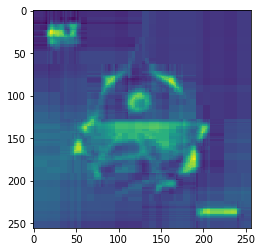

In [0]:
npImageG = gaussian_filter(npImage, sigma=2.5)


print('Image avec du bruit')
plt.imshow(npImageG, interpolation='nearest')
plt.show()

npImageGH = transformDirect2D(npImageG,1)

N = len(npImageGH)
v = np.sqrt(np.var(npImageGH))
s = (((np.sqrt(math.log2(N))))*v)


npImageGHS = seuillage(npImageGH,s) #seuil dou
npImageGHD = seuillage2(npImageGH,s) #seuil dur

print('Image corriger avec un seuil dou de ',s)
plt.imshow(transformInv2D(npImageGHS,1), interpolation='nearest')
plt.show()

print('Image corriger avec un seuil dur de ',s)
plt.imshow(transformInv2D(npImageGHD,1), interpolation='nearest')
plt.show()

#Exercice 5: Implemetation de l'étude numérique de l'erreur

In [0]:
def normeL2(A,B):
    if len(A)!=len(B):
        print("Les deux vecteurs on des tailles différente")
        return
    else:
        n=len(A)
        v=0
        for i in range(n):
          for j in range(n):
            v=v + np.square(np.absolute(A[i,j]-B[i,j]))
        v= np.sqrt(v)
        return v

npImageG = gaussian_filter(npImage, sigma=2.5)

npImageGH = transformDirect2D(npImageG,1)

N = len(npImageGH)
v = np.sqrt(np.var(npImageGH))
s = (((np.sqrt(math.log2(N))))*v)


npImageGHS = transformInv2D(seuillage(npImageGH,s),1) #seuil dou
npImageGHD = transformInv2D(seuillage2(npImageGH,s),1) #seuil dur

print(normeL2(npImage,npImageGHS))
print(normeL2(npImage,npImageGHD))

2.686087420453924 

5093.505439928968
4185.448310922803


#Exercice 6: Etude de l'erreur celon le seuille

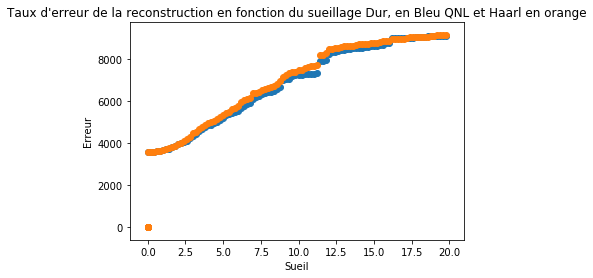

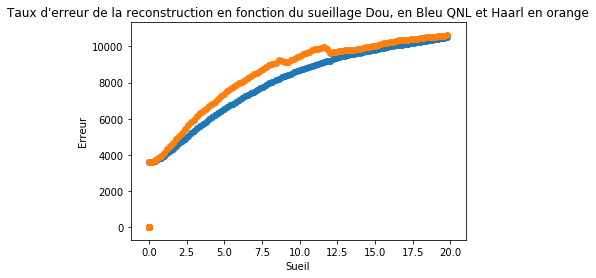

In [0]:
npImageGH = transformDirect2D(npImageG,1)
npImageGQ = transformDirect2DQ(npImageG,1)

t = np.zeros((250))
stH = np.zeros((250))
stQ = np.zeros((250))

for i in range(100):
  #print(i)
  t[i] = i*0.2
  stH[i] = normeL2(npImage, transformInv2D(seuillage2(npImageGH,i*0.2),1))
  stQ[i] = normeL2(npImage, transformInv2DQ(seuillage2(npImageGQ,i*0.2),1))
  
plt.scatter(t,stH)
plt.scatter(t,stQ)
plt.title('Taux d\'erreur de la reconstruction en fonction du sueillage Dur, en Bleu QNL et Haarl en orange')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

t = np.zeros((250))
stH = np.zeros((250))
stQ = np.zeros((250))

for i in range(100):
  #print(i)
  t[i] = i*0.2
  stH[i] = normeL2(npImage, transformInv2D(seuillage(npImageGH,i*0.2),1))
  stQ[i] = normeL2(npImage, transformInv2DQ(seuillage(npImageGQ,i*0.2),1))
  
plt.scatter(t,stH)
plt.scatter(t,stQ)
plt.title('Taux d\'erreur de la reconstruction en fonction du sueillage Dou, en Bleu QNL et Haarl en orange')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

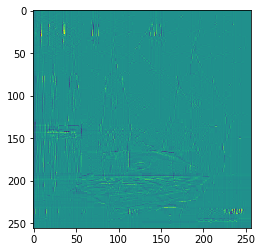

In [15]:
plt.imshow(transformInv2D(seuillage(transformDirect2D(npImage,2),1),1))
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
